<a href="https://colab.research.google.com/github/saksham99-beep/AI1110/blob/main/AirQualityPrediction(renewed).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#"Air Quality Prediction"

Task: Predict air pollution level (target variable: pollutant concentration) using environmental features.

Dataset: Air Quality Data in India

Link: https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india

In [2]:
import pandas as pd
city_day = pd.read_csv("city_day.csv")
station_day = pd.read_csv("station_day.csv")



**Predict pollutant concentration / AQI using environmental features from:**

City-level data

Station-level data

Daily & hourly data

**We will mainly train models on**:
👉 city_day.csv (main dataset)

and use others for:

1. Validation

2. Additional analysis

3. Visualization

In [3]:
#Check shape-n-size(rows n columns)
#no. of records and features in dataset

print("city_day:", city_day.shape)
print("station_day:", station_day.shape)


city_day: (29531, 16)
station_day: (108035, 16)


**This helps you identify:**

pollutant features

date/time columns

city/station columns

In [4]:
#View column names

print(city_day.columns)
print(station_day.columns)


Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')
Index(['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


**Check:**

missing values

data format

type of values

In [5]:
#preview data
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [6]:
station_day.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [7]:
#check datatypes and null values

datasets = {
    "city_day": city_day,
    "station_day": station_day
}

for name, df in datasets.items():
    print(f"\n ====== {name.upper()} DATASET ======")
    print(df.info())
    print("\n Missing values:")
    print(df.isnull().sum())


 ====== CITY_DAY DATASET ======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None

 Missing values:
City              0
Date              0
PM2.

**Data Cleaning & Preprocessing**

Handle missing values, convert date columns, and prepare data.

In [9]:
def clean_dataset(df):
    df = df.copy()  # create a safe copy to avoid SettingWithCopyWarning

    # Drop rows where AQI is missing (only if AQI column exists)
    if "AQI" in df.columns:
        df = df.dropna(subset=["AQI"])

    # Fill remaining numeric missing values with column mean
    df.fillna(df.mean(numeric_only=True), inplace=True)

    return df

# Apply cleaning function to datasets that contain AQI
city_day_clean = clean_dataset(city_day)
station_day_clean = clean_dataset(station_day)

# .iloc[0] selects the first row of the mode result (since mode() can return multiple values)
# fillna(...) replaces all missing values (NaN) with those most frequent values

In [10]:
#After Cleaning:-
print("city_day_clean:", city_day_clean.shape)
print("station_day_clean:", station_day_clean.shape)

#how many rows were removed
#confirms datasets exist in memory

city_day_clean: (24850, 16)
station_day_clean: (87025, 16)


In [ ]:
#preview cleaned Datasets:-

city_day_clean.head()



,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
28,Ahmedabad,2015-01-29,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
29,Ahmedabad,2015-01-30,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
30,Ahmedabad,2015-01-31,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
31,Ahmedabad,2015-02-01,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
32,Ahmedabad,2015-02-02,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe


In [ ]:
station_day_clean.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
5,AP001,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate


In [11]:
#Dataset Info:(for confirmation)
city_day_clean.info()
station_day_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 24850 entries, 28 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        24850 non-null  object 
 1   Date        24850 non-null  object 
 2   PM2.5       24850 non-null  float64
 3   PM10        24850 non-null  float64
 4   NO          24850 non-null  float64
 5   NO2         24850 non-null  float64
 6   NOx         24850 non-null  float64
 7   NH3         24850 non-null  float64
 8   CO          24850 non-null  float64
 9   SO2         24850 non-null  float64
 10  O3          24850 non-null  float64
 11  Benzene     24850 non-null  float64
 12  Toluene     24850 non-null  float64
 13  Xylene      24850 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.2+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 87025 entries, 1 to 108034
Data columns (total 16 columns):

**Exploratory Data Analysis (EDA)**

Understand data patterns

See relationships between pollutants and AQI

Find trends over time

Prepare for model building

In [12]:
datasets_clean = {
    "city_day_clean": city_day_clean,
    "station_day_clean": station_day_clean
}

for name, df in datasets_clean.items():
    print(f"\n================ {name.upper()} =================")
    print(df.describe(include="all"))

    #if confusion why shows NaN values this includes ("all").


================ CITY_DAY_CLEAN =================
         City        Date         PM2.5          PM10            NO  \
count   24850       24850  24850.000000  24850.000000  24850.000000   
unique     26        2009           NaN           NaN           NaN   
top     Delhi  2020-05-09           NaN           NaN           NaN   
freq     1999          26           NaN           NaN           NaN   
mean      NaN         NaN     67.476613    118.454435     17.622421   
std       NaN         NaN     62.208948     75.660357     22.245859   
min       NaN         NaN      0.040000      0.030000      0.030000   
25%       NaN         NaN     29.560000     71.780000      5.720000   
50%       NaN         NaN     50.165000    118.454435     10.075000   
75%       NaN         NaN     79.507500    122.957500     19.710000   
max       NaN         NaN    914.940000    917.080000    390.680000   

                 NO2           NOx           NH3            CO           SO2  \
count   24850.00

In [13]:
#For truly missing values
datasets_clean = {
    "city_day_clean": city_day_clean,
    "station_day_clean": station_day_clean,
}

for name, df in datasets_clean.items():
    print(f"\n{name}")
    print(df.isnull().sum())


city_day_clean
City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

station_day_clean
StationId     0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


**city_day_clean (main dataset)
➕ station_day_merged (optional, since merged )**

AQI distribution

Relationships between pollutants

Trends over time

City-wise / station-wise pollution

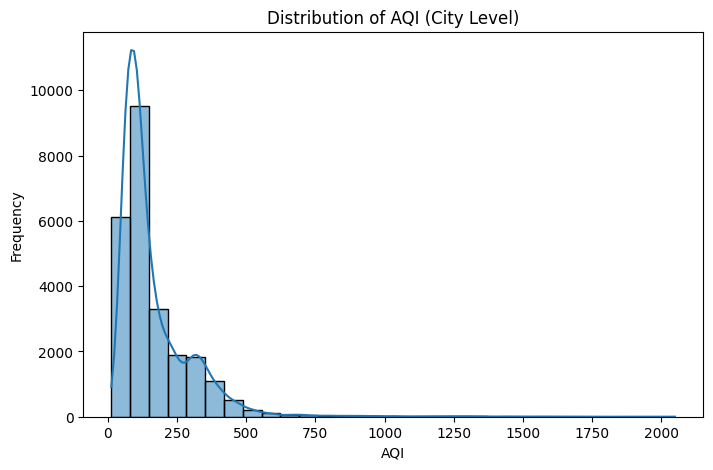

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

#AQI Distribution (City-level)
plt.figure(figsize=(8,5))
sns.histplot(city_day_clean["AQI"], bins=30, kde=True)
plt.title("Distribution of AQI (City Level)")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()

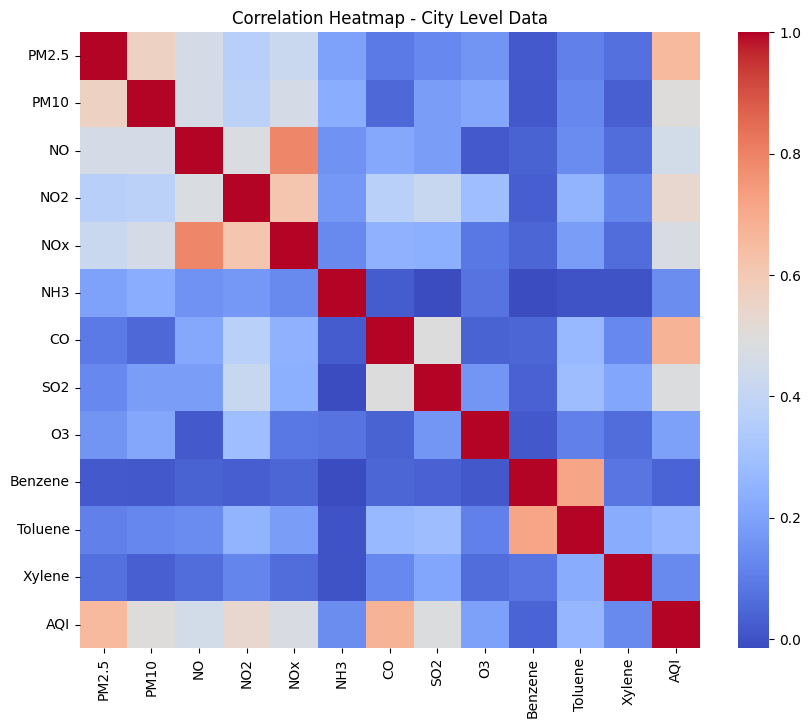

In [16]:
#Correlation Heatmap (Pollutants vs AQI)
plt.figure(figsize=(10,8))
sns.heatmap(city_day_clean.corr(numeric_only=True), cmap="coolwarm", annot=False) # cmap=color map, annot=annotation for seeing correlated values
plt.title("Correlation Heatmap - City Level Data")
plt.show()

#This shows which pollutants (PM2.5, PM10, etc.) affect AQI most.

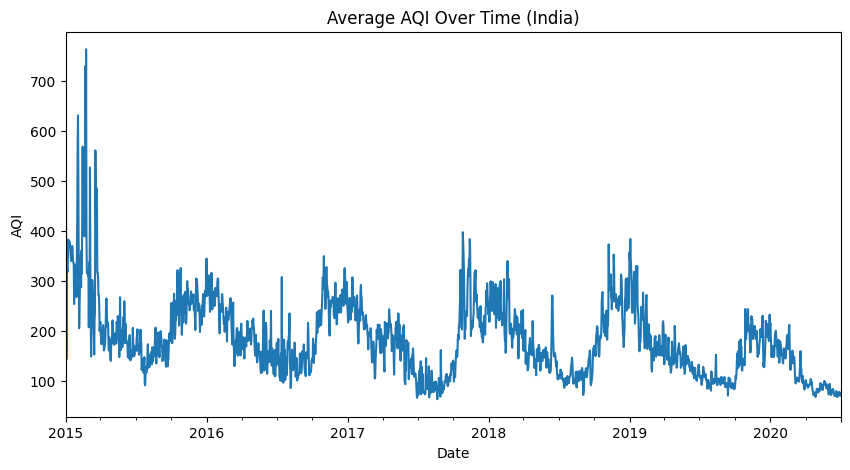

In [17]:
#AQI Trend Over Time
city_day_clean["Date"] = pd.to_datetime(city_day_clean["Date"])

plt.figure(figsize=(10,5))
city_day_clean.groupby("Date")["AQI"].mean().plot()
plt.title("Average AQI Over Time (India)")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.show()

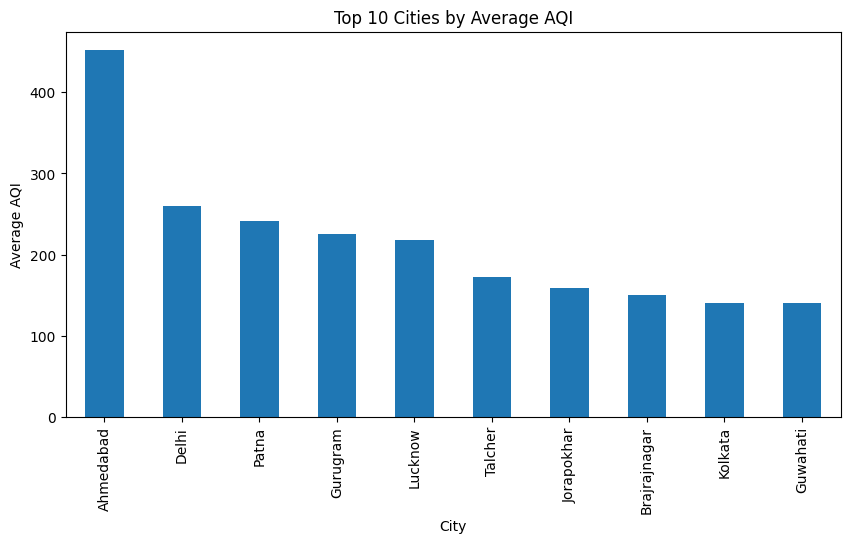

In [18]:
#Top 10 Cities with Highest Average AQI
top_cities = city_day_clean.groupby("City")["AQI"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_cities.plot(kind="bar")
plt.title("Top 10 Cities by Average AQI")
plt.ylabel("Average AQI")
plt.show()

**Station Level**

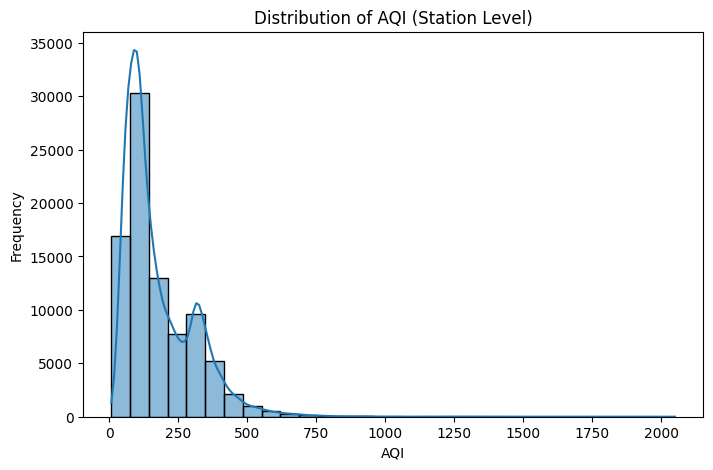

In [22]:
#Station-level AQI Distribution
plt.figure(figsize=(8,5))
sns.histplot(station_day["AQI"], bins=30, kde=True)
plt.title("Distribution of AQI (Station Level)")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()

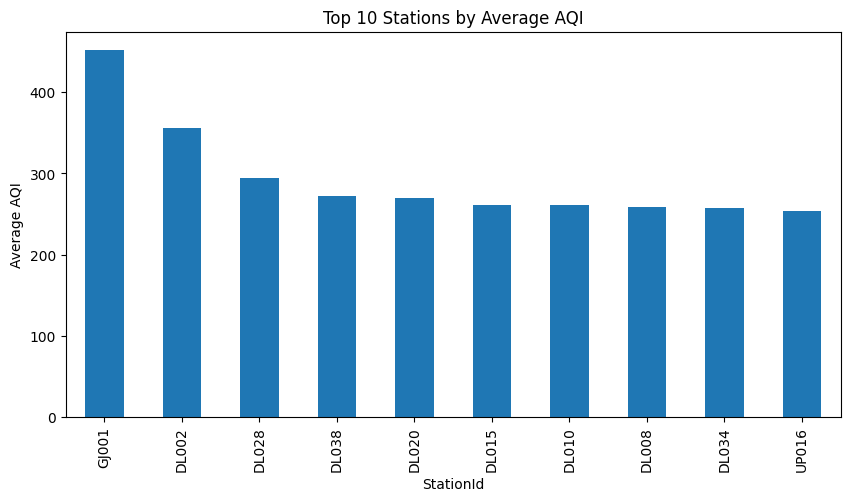

In [25]:
#Station-wise Average AQI
# The original error 'KeyError: 'State'' occurred because the 'station_day' dataframe does not contain a 'State' column.
# We can group by 'StationId' instead to see the average AQI per station.
station_avg = station_day_clean.groupby("StationId")["AQI"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
station_avg.plot(kind="bar")
plt.title("Top 10 Stations by Average AQI")
plt.ylabel("Average AQI")
plt.show()